In [148]:
### from __future__ import print_function
import pandas as pd
import numpy as np
import os
import pickle
import os.path
from datetime import datetime
import pyarrow
import matplotlib.pyplot as plt
%matplotlib inline
font = {'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

#set ggplot style
plt.style.use('ggplot')

In [149]:
# Dynamic parameters
data_dir  = '../data/' + str(datetime.date(datetime.now()))
agg_file  = 'agg_data_{}.parquet.gzip'.format(datetime.date(datetime.now()))
trend_file  = 'trend_{}.csv'.format(datetime.date(datetime.now()))
report  = 'report_{}.xlsx'.format(datetime.date(datetime.now()))



print(trend_file)

# import data
agg_df = pd.read_parquet(os.path.join(data_dir, agg_file))
daily_df = pd.read_csv(os.path.join(data_dir, trend_file))

#Create place to save diagrams
image_dir = './images/'
if not os.path.exists(image_dir):
    os.mkdir(image_dir)

trend_2020-03-04.csv


In [150]:
# Convert types
for col in ['confirmed', 'deaths', 'recovered']:
    agg_df[col] = agg_df[col].replace('', 0).astype(int)

# Trend Lines

In [151]:



# Plot and save trendline graph
def create_trend_line(tmp_df, col, col2, col3):
    fig, ax = plt.subplots(figsize=(20,10))
    tmp_df.groupby(['date'])[[col, col2, col3]].sum().plot(ax=ax, marker='o')
    fig = ax.get_figure()
    fig.savefig(os.path.join(image_dir, '{}_trendline.jpg'.format(col)))

# Plot and save trendline graph
def MA_trend_line(tmp_df, col, col2):
    fig, ax = plt.subplots(figsize=(20,10))
    tmp_df.groupby(['date'])[[col, col2]].sum().plot(ax=ax)
    fig = ax.get_figure()
#     fig.savefig(os.path.join(image_dir, '{}_trendline.jpg'.format(col)))    

# Plot and save trendline graph
def exp_MA_trend_line(tmp_df, col, col2):
    fig, ax = plt.subplots(figsize=(20,10))
    tmp_df.groupby(['date'])[[col, col2]].sum().plot(ax=ax)
    fig = ax.get_figure()
#     fig.savefig(os.path.join(image_dir, '{}_trendline.jpg'.format(col)))    
    
def create_bar(tmp_df, col, rgb):
    fig, ax = plt.subplots(figsize=(20,10))
    tmp = tmp_df.head(30).groupby(['date'])[[col]].sum()
    tmp.plot.bar(ax=ax, rot=45, color=rgb)
    fig = ax.get_figure()
    fig.savefig(os.path.join(image_dir, '{}_bar.jpg'.format(col)))
    
    
def create_stacked_bar(tmp_df, col1, col2, fig_title):
    tmp_df = tmp_df.set_index('date')
    fig, ax = plt.subplots(figsize=(20,10))
    tmp_df[[col2, col1]].plot.bar(ax=ax,
                                  rot=45,
                                  stacked=True,
                                  title=fig_title);
    fig = ax.get_figure()
    fig.savefig(os.path.join(image_dir, '{}_stacked_bar.jpg'.format(col2)))

Creating graphs...
... Time Series Trend Line


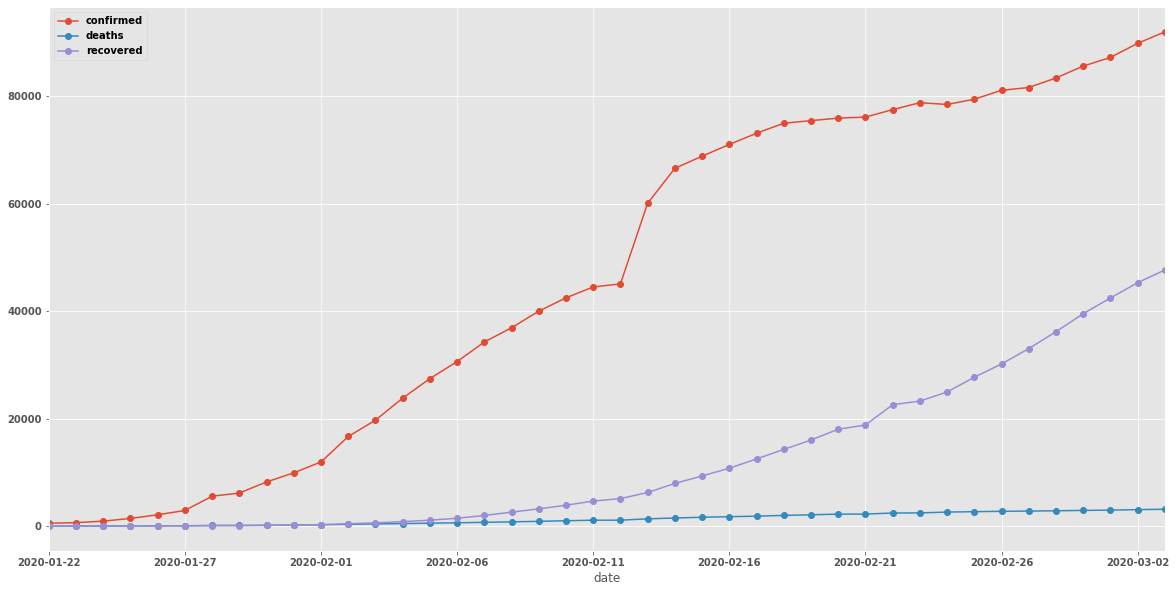

In [152]:
##### Create Graphs #####
    
print('Creating graphs...')
print('... Time Series Trend Line')
# Time Series Data Plots
create_trend_line(agg_df, 'confirmed', 'deaths', 'recovered')


... Daily Figures
... Daily New Infections Differences


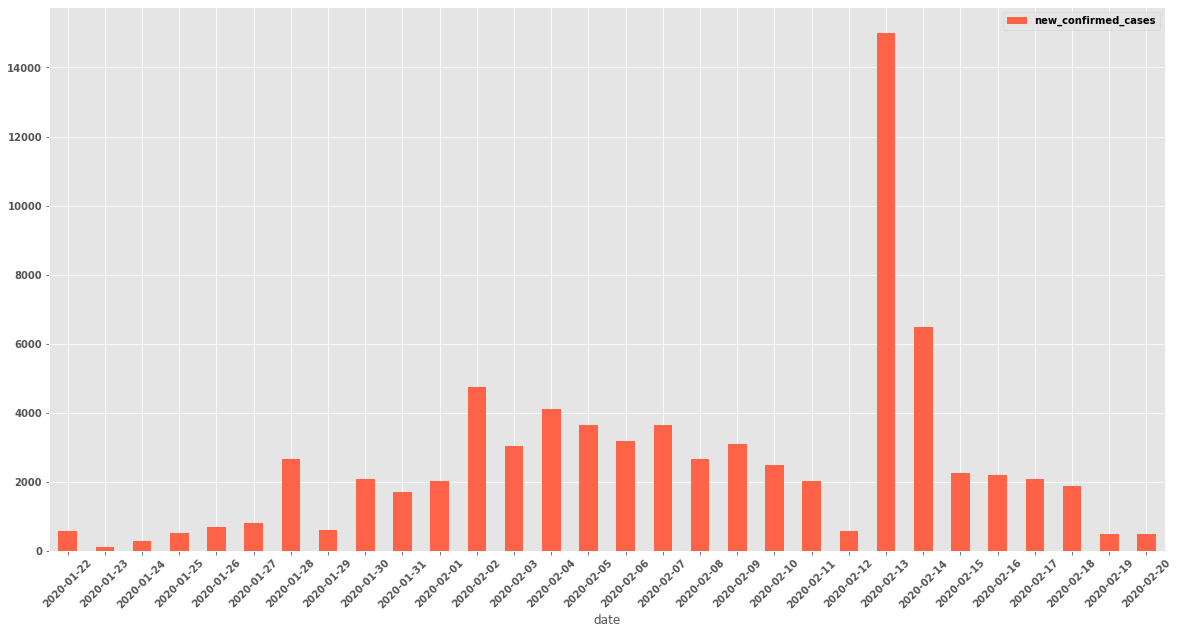

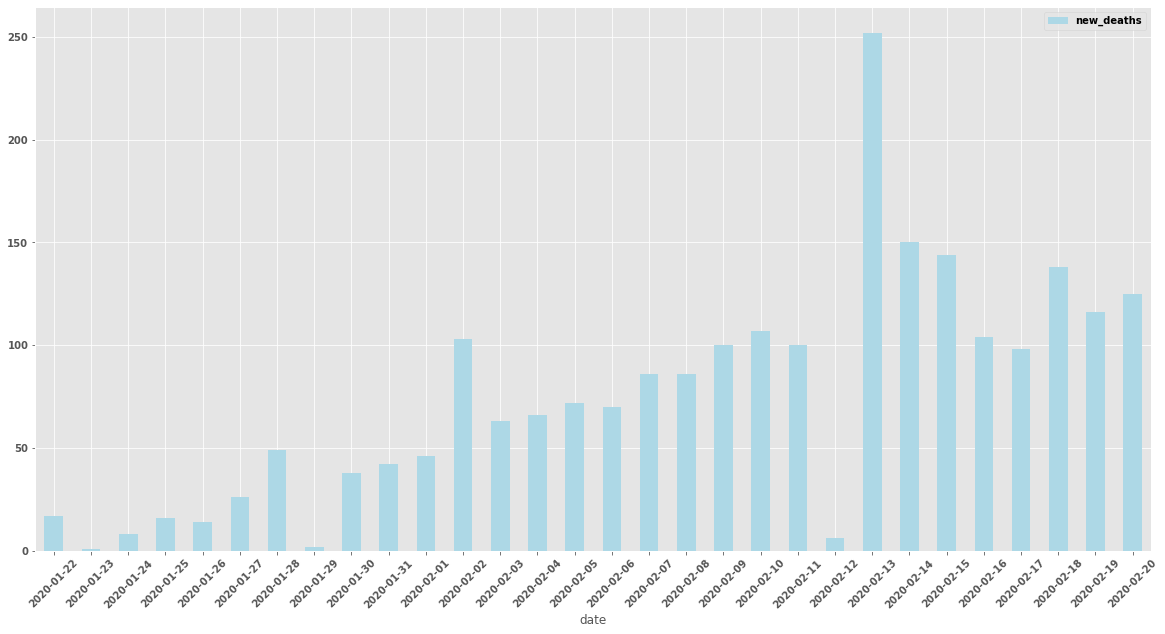

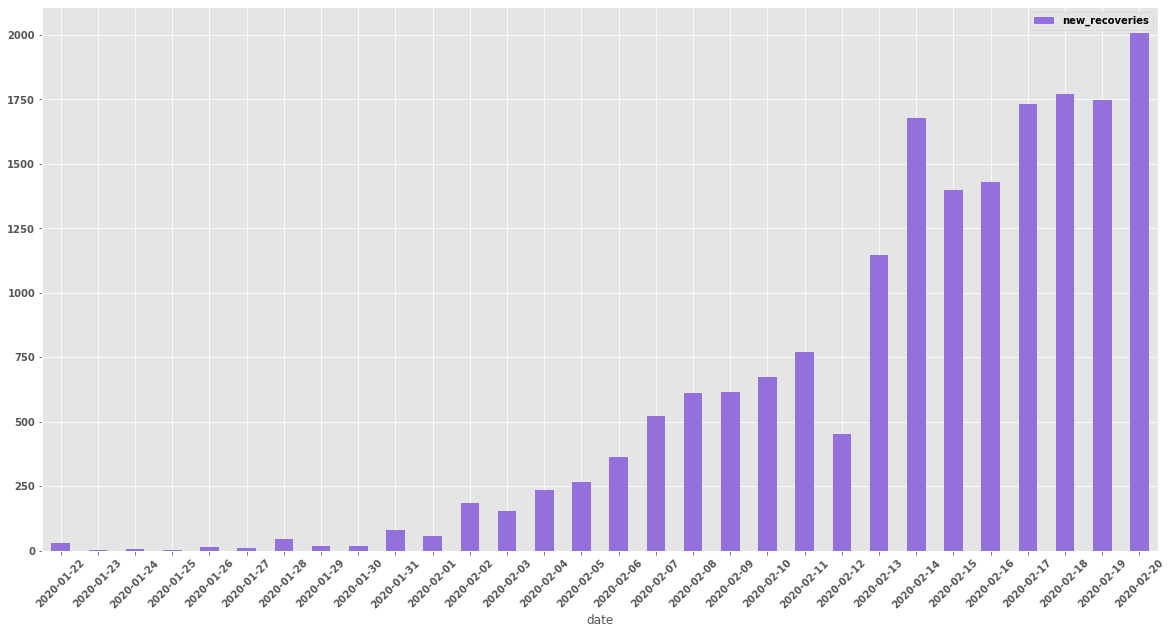

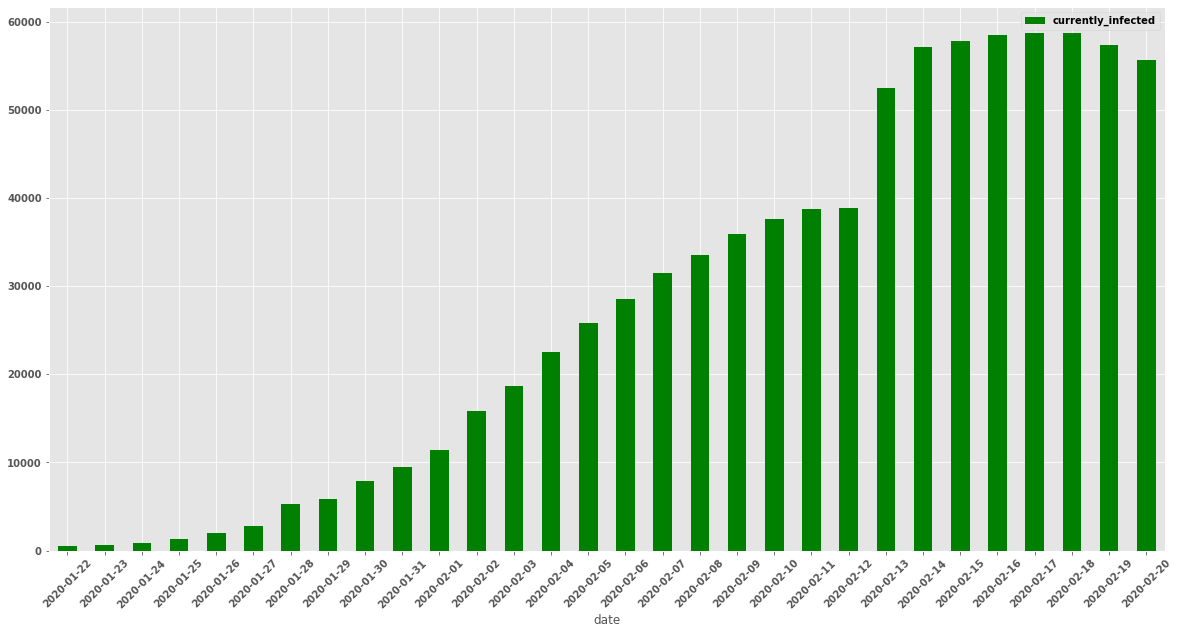

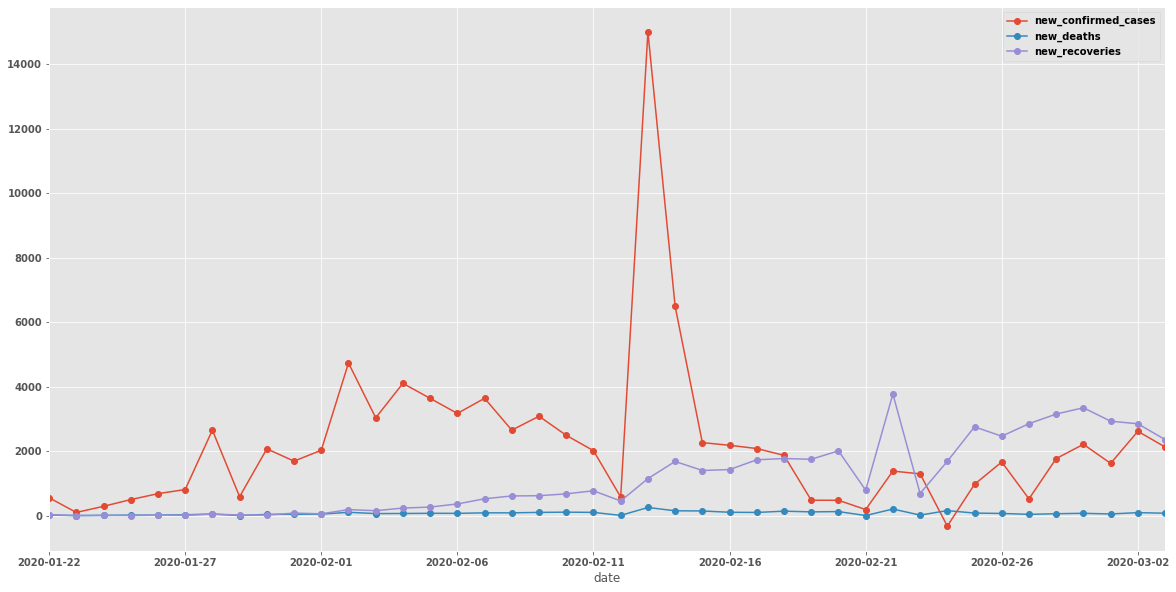

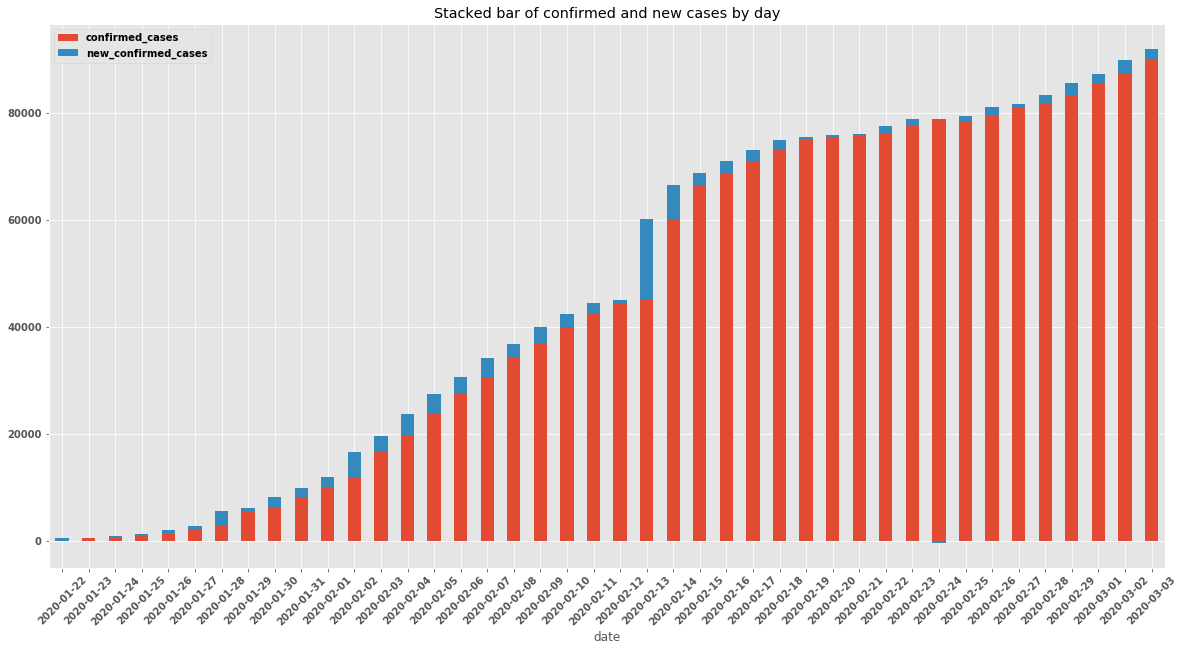

In [153]:

print('... Daily Figures')
# Daily Figures Data Plots
daily_figures_cols = ['new_confirmed_cases', 'new_deaths', 'new_recoveries', 'currently_infected']
for col, rgb in zip(daily_figures_cols, ['tomato', 'lightblue', 'mediumpurple', 'green']):
    create_bar(daily_df, col, rgb)    
    
# Trend line for new cases
create_trend_line(daily_df, 'new_confirmed_cases', 'new_deaths', 'new_recoveries')
    
    
print('... Daily New Infections Differences')
new_df = pd.DataFrame([])
new_df['date'] = daily_df['date']
new_df['confirmed_cases'] = agg_df.groupby(['date']).confirmed.sum().values - daily_df.new_confirmed_cases
new_df['new_confirmed_cases'] = daily_df.new_confirmed_cases
create_stacked_bar(new_df, 'new_confirmed_cases', 'confirmed_cases', "Stacked bar of confirmed and new cases by day")

## Forecasting 

## REPORTING

In [154]:
import glob


In [161]:
workbook_writer = pd.ExcelWriter(os.path.join(data_dir, report), engine='xlsxwriter')

In [162]:
daily_df.to_excel(workbook_writer, sheet_name='spam_email_references')  

workbook = workbook_writer.book



# Get all images for each type
def read_images(path, graph_type):
    image_list = []
    for fn in glob.glob(os.path.join(path, '*_{}.jpg'.format(graph_type))):
        image_list.append(fn)    
    images = {graph_type : image_list}
    return dict(images)

def get_image_types(path):
    # get all the possible types of images in
    # the passed directory path
    types = []
    for fn in glob.glob(os.path.join(path, '*.jpg')):
        types.append(fn.split('_',)[-1].split('.')[0])
    
    return types

image_types = get_image_types(image_dir)

padding = 1 # Set padding for images in spreadsheet
for types in set(image_types):
    type_dict = read_images(image_dir, types)
    
    # Add image to the worksheet
    worksheet = workbook.add_worksheet(name='{}_graphs'.format(types))
    for image in type_dict[types]:
        worksheet.insert_image('A' +str(padding), image) 
        padding += 50
    padding = 1
    
workbook.close()

In [163]:
for i in type_dict['bar']:
    print(i)

./images/confirmed_cases_stacked_bar.jpg
./images/new_recoveries_bar.jpg
./images/new_confirmed_cases_bar.jpg
./images/currently_infected_bar.jpg
./images/new_deaths_bar.jpg


In [164]:
#     spam_df.to_excel(workbook_writer, sheet_name='spam_email_references')   
workbook.close()


In [146]:
# workbook.